In [69]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_images(images, titles, rows=2, cols=4):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [21]:
cap = cv2.VideoCapture(0)  # Use 0 or 1 for different cameras
ret, frame = cap.read()
if ret:
    cv2.imwrite("input_image.jpg", frame)
cap.release()


In [71]:
def greyscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image = cv2.imread('input_image.jpg')
grey = greyscale(image)


In [72]:
def black_white_threshold(image, thresh_val=128):
    _, thresh = cv2.threshold(image, thresh_val, 255, cv2.THRESH_BINARY)
    return thresh

bw_thresh = black_white_threshold(grey)


In [73]:
def grey_16_levels(image):
    grey_16 = (image // 16) * 16
    return grey_16

grey_16 = grey_16_levels(grey)


In [74]:
def sobel_edge(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)
    return sobel

def canny_edge(image):
    return cv2.Canny(image, 50, 150)

sobel = sobel_edge(grey)
canny = canny_edge(grey)


In [75]:
def gaussian_blur(image, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    return cv2.filter2D(image, -1, kernel)

blurred = gaussian_blur(grey)


In [76]:
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], 
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

sharpened = sharpen_image(blurred)


In [77]:
def rgb_to_bgr(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

bgr_image = rgb_to_bgr(image)


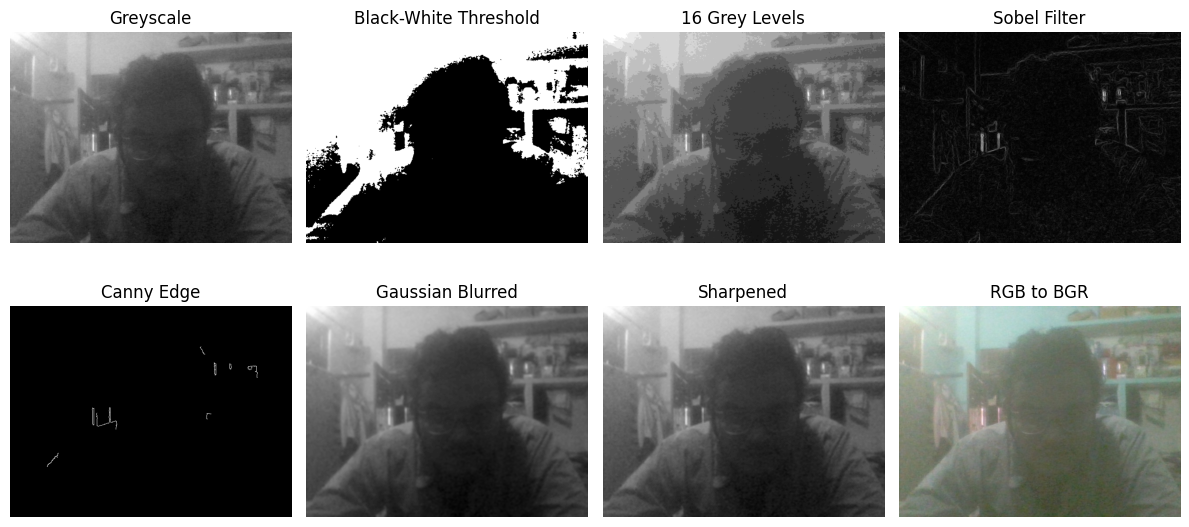

In [78]:
images = [grey, bw_thresh, grey_16, sobel, canny, blurred, sharpened, bgr_image]
titles = ['Greyscale', 'Black-White Threshold', '16 Grey Levels', 'Sobel Filter', 
          'Canny Edge', 'Gaussian Blurred', 'Sharpened', 'RGB to BGR']
show_images(images, titles)


In [79]:
print("High Pass Image Shape:", high_pass.shape)
print("Low Pass Image Shape:", low_pass.shape)


High Pass Image Shape: (500, 500)
Low Pass Image Shape: (500, 500)


In [80]:
def resize_image(image, width, height):
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

# Ensure both images are the same size
target_width, target_height = image1.shape[1], image1.shape[0]
high_pass_resized = resize_image(high_pass, target_width, target_height)
low_pass_resized = resize_image(low_pass, target_width, target_height)

# Combine the images
hybrid_image = cv2.addWeighted(high_pass_resized, 0.5, low_pass_resized, 0.5, 0)


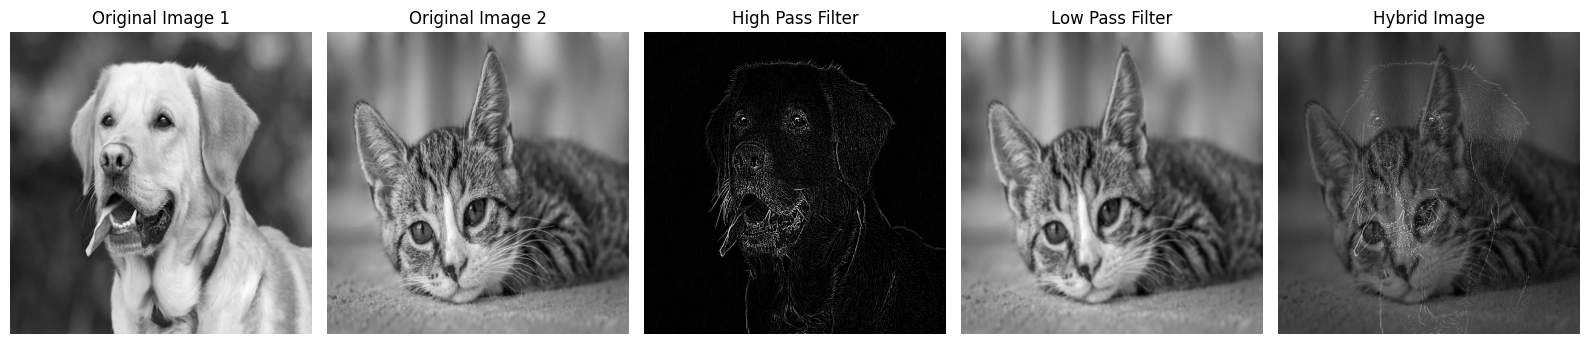

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function: High Pass Filter
def high_pass_filter(image):
    kernel = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

# Function: Low Pass Filter
def low_pass_filter(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Function: Resize Image
def resize_image(image, width, height):
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

# Function: Display Images Using Matplotlib
def show_images_matplotlib(images, titles):
    plt.figure(figsize=(16, 6))  # Adjust size of the figure
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')  # Display in grayscale
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Load Images
image1 = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

# Check if Images Are Loaded Properly
if image1 is None or image2 is None:
    print("Error: One or both images not found. Check the file paths.")
else:
    # Resize Images to the Same Dimensions
    target_width, target_height = 500, 500  # Fixed smaller size for performance
    image1_resized = resize_image(image1, target_width, target_height)
    image2_resized = resize_image(image2, target_width, target_height)

    # Apply High Pass and Low Pass Filters
    high_pass = high_pass_filter(image1_resized)
    low_pass = low_pass_filter(image2_resized)

    # Combine the Two Images (Hybrid Image)
    hybrid_image = cv2.addWeighted(high_pass, 0.5, low_pass, 0.5, 0)

    # Display All Results Using Matplotlib
    show_images_matplotlib(
        [image1_resized, image2_resized, high_pass, low_pass, hybrid_image],
        ["Original Image 1", "Original Image 2", "High Pass Filter", "Low Pass Filter", "Hybrid Image"]
    )


In [82]:
from PIL import Image

def detect_flag(image_path):
    img = Image.open(image_path).convert('L')
    img_np = np.array(img)
    
    top_half = img_np[:img_np.shape[0] // 2, :]
    bottom_half = img_np[img_np.shape[0] // 2:, :]
    
    top_mean = np.mean(top_half)
    bottom_mean = np.mean(bottom_half)
    
    if top_mean > bottom_mean:
        return "Poland Flag"
    else:
        return "Indonesia Flag"

result = detect_flag('flag_image.jpg')
print(result)


Indonesia Flag


In [86]:
cv2.imwrite("greyscale.jpg", grey)
cv2.imwrite("black_white_threshold.jpg", bw_thresh)
cv2.imwrite("grey_16_levels.jpg", grey_16)
cv2.imwrite("sobel.jpg", sobel)
cv2.imwrite("canny.jpg", canny)
cv2.imwrite("gaussian_blur.jpg", blurred)
cv2.imwrite("sharpened.jpg", sharpened)
cv2.imwrite("high_pass.jpg", high_pass)
cv2.imwrite("low_pass.jpg", low_pass)
cv2.imwrite("hybrid_image.jpg", hybrid_image)
cv2.imwrite("image1_resized.jpg", image1_resized)
cv2.imwrite("image2_resized.jpg", image2_resized)


True

In [84]:
import cv2

# Load the image using OpenCV
image_bgr = cv2.imread('input_image.jpg')

# Print pixel values at (0, 0) in BGR
print(image_bgr[0, 0])  # Should output [255, 255, 254] in BGR format

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Print pixel values at (0, 0) in RGB
print(image_rgb[0, 0])  # Should output [254, 255, 255] in RGB format



[255 255 254]
[254 255 255]


In [85]:
from PIL import Image

# Open the .webp image
img = Image.open('image1.jpg')

# Convert and save it as .jpg
img.save('image1.jpg', 'JPEG')
